<a href="https://colab.research.google.com/github/boradj/Time-series-ML/blob/main/HAR_model/gru1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
#This will prompt for authorization # to take permission from user to use google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This is important!
import os
os.environ['TF_ENABLE_CONTROL_FLOW_V2'] = '1'

import tensorflow as tf
import numpy as np

In [ ]:
# load a file into memory
df=pd.read_csv('/content/drive/My Drive/data/new/DataSet/dataf.csv')
df.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity,label
0,4.590100,-2.0431,2.65600,0.76963,6.937000,3.6223,0.47495,-1.2327,-0.118810,walking,2
1,3.732000,-2.4517,1.93410,-0.30694,6.452800,2.6874,1.84180,-0.6970,-0.845740,walking,2
2,0.054481,-8.9622,4.15420,-3.69680,0.098022,4.2580,2.29650,-2.2110,-0.991430,walking,2
3,-6.565000,-18.6730,7.54570,-9.12310,-9.227100,6.9194,3.26630,-4.1267,0.054978,walking,2
4,-2.029400,-11.1960,-0.84446,-3.31990,-1.507200,-1.6408,3.28890,-3.4725,0.760220,walking,2


In [ ]:
print(df.shape)

(540000, 11)


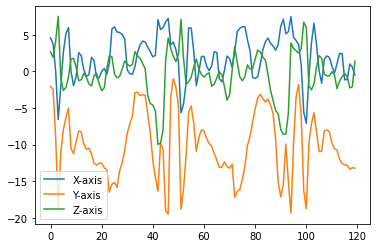

In [ ]:
# change in values while walking

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="walking"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="walking"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="walking"][:120], label='Z-axis')
plt.legend()

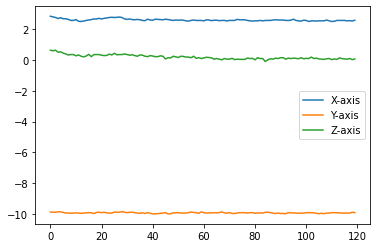

In [ ]:
# change in values while standing

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="standing"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="standing"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="standing"][:120], label='Z-axis')
plt.legend()

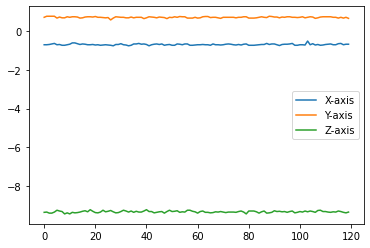

In [ ]:
# change in values while standing

plt.plot(np.arange(0,120),df.Ax[df['Activity']=="sitting"][:120], label='X-axis')
plt.plot(np.arange(0,120),df.Ay[df['Activity']=="sitting"][:120], label='Y-axis')
plt.plot(np.arange(0,120),df.Az[df['Activity']=="sitting"][:120], label='Z-axis')
plt.legend()

In [ ]:
df.Activity.unique()

array(['walking', 'standing', 'sitting'], dtype=object)

In [ ]:
df['Activity'].value_counts()

walking     180000
standing    180000
sitting     180000
Name: Activity, dtype: int64

In [ ]:
df3 = df
df3.drop('Lx', inplace=True, axis=1)

In [ ]:
df3.drop('Ly', inplace=True, axis=1)
df3.drop('Lz', inplace=True, axis=1)

In [ ]:
df3

,Ax,Ay,Az,Gx,Gy,Gz,Activity,label
0,4.590100,-2.04310,2.65600,0.474950,-1.232700,-0.118810,walking,2
1,3.732000,-2.45170,1.93410,1.841800,-0.697000,-0.845740,walking,2
2,0.054481,-8.96220,4.15420,2.296500,-2.211000,-0.991430,walking,2
3,-6.565000,-18.67300,7.54570,3.266300,-4.126700,0.054978,walking,2
4,-2.029400,-11.19600,-0.84446,3.288900,-3.472500,0.760220,walking,2
...,...,...,...,...,...,...,...,...
539995,-2.220100,-0.96704,-9.47980,0.013744,0.019242,0.003665,sitting,0
539996,-2.192900,-1.00790,-9.49340,0.016493,0.025351,0.004276,sitting,0
539997,-2.220100,-1.00790,-9.47980,0.015882,0.021686,0.004276,sitting,0
539998,-2.220100,-0.95342,-9.54790,0.010996,0.023518,0.004276,sitting,0


In [ ]:
X_train = df3[df3.columns[:6]]
y_train = df3[df3.columns[6:7]]

In [ ]:
X_train

,Ax,Ay,Az,Gx,Gy,Gz
0,4.590100,-2.04310,2.65600,0.474950,-1.232700,-0.118810
1,3.732000,-2.45170,1.93410,1.841800,-0.697000,-0.845740
2,0.054481,-8.96220,4.15420,2.296500,-2.211000,-0.991430
3,-6.565000,-18.67300,7.54570,3.266300,-4.126700,0.054978
4,-2.029400,-11.19600,-0.84446,3.288900,-3.472500,0.760220
...,...,...,...,...,...,...
539995,-2.220100,-0.96704,-9.47980,0.013744,0.019242,0.003665
539996,-2.192900,-1.00790,-9.49340,0.016493,0.025351,0.004276
539997,-2.220100,-1.00790,-9.47980,0.015882,0.021686,0.004276
539998,-2.220100,-0.95342,-9.54790,0.010996,0.023518,0.004276


In [ ]:
y_train

,Activity
0,walking
1,walking
2,walking
3,walking
4,walking
...,...
539995,sitting
539996,sitting
539997,sitting
539998,sitting


In [ ]:
y_train.Activity.unique()

array(['walking', 'standing', 'sitting'], dtype=object)

In [ ]:
Cust_rating = {'sitting':0, 'walking': 1, 'standing': 3}


In [ ]:
y_train = y_train.Activity.map(Cust_rating)


In [ ]:
y_train

0         1
1         1
2         1
3         1
4         1
         ..
539995    0
539996    0
539997    0
539998    0
539999    0
Name: Activity, Length: 540000, dtype: int64

In [ ]:
y_train.to_csv('/content/df.csv')

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 50
frame_size = Fs*30 # 80
hop_size = Fs*30 # 40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['Ax'].values[i: i + frame_size]
        y = df['Ay'].values[i: i + frame_size]
        z = df['Az'].values[i: i + frame_size]
        a = df['Gx'].values[i: i + frame_size]
        b = df['Gy'].values[i: i + frame_size]
        c = df['Gz'].values[i: i + frame_size]
         
        
        # Retrieve the most often used label in this segment
        global label
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z, a, b, c])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_frames(df3, frame_size, hop_size)

In [ ]:
from pandas.core.frame import DataFrame
df4 = X[0]
df5  = DataFrame(df4)

In [ ]:
print(df5)

             0        1         2         3        4         5
0     4.590100  3.73200  0.054481 -6.565000 -2.02940  2.628700
1     5.134900  5.99300  0.027241 -1.947700 -0.70826  2.574200
2     2.179300  0.23155 -0.694640 -0.449470  1.93410  1.498200
3    -0.830840 -0.87170  0.027241  0.408610 -0.38137  1.130500
4     5.815900  6.08830  5.393700  5.311900  5.06680  4.467500
...        ...      ...       ...       ...      ...       ...
1495 -1.008800 -0.68661  0.282220  0.442270  0.63194 -0.039095
1496 -0.872010 -0.28100 -0.086743 -0.036346 -0.25962 -0.513130
1497 -0.777020 -0.88575 -0.714100 -0.576960 -0.50641 -0.362850
1498 -0.083994  0.15027  0.280390  0.348190  0.53665  0.722040
1499  0.624920  0.50335  0.546420  0.420580  0.38118  0.631630

[1500 rows x 6 columns]


In [ ]:
print(y)

[2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2
 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2
 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2
 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2
 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2
 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2
 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1
 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1
 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1
 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0]


In [ ]:
from pandas.core.frame import DataFrame
df4 = y
df5  = DataFrame(df4)

In [ ]:
print(df5[0])

0      2
1      2
2      2
3      2
4      2
      ..
354    0
355    0
356    0
357    0
358    0
Name: 0, Length: 359, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df5)
print(transformed.toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
transformed.shape

(359, 3)

In [ ]:
Cust_rating1 = {2: 1, 1: 3 , 0: 0}


In [ ]:
df6 = df5
df6 = df6[0].map(Cust_rating1)

In [ ]:
print(df6)

0      1
1      1
2      1
3      1
4      1
      ..
354    0
355    0
356    0
357    0
358    0
Name: 0, Length: 359, dtype: int64


In [ ]:
c = df6.to_numpy()

In [ ]:
print(c)

[1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1
 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1
 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1
 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1
 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1
 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1
 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3
 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3
 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3
 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0]


In [ ]:
df6.to_csv('/content/df6.csv')

In [ ]:
X.shape

(359, 1500, 6)

In [ ]:
y = c

In [ ]:
print(y)

[1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1
 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1
 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1
 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1
 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1
 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1
 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3
 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3
 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3
 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 0 0 0 0 0]


In [ ]:
X.shape, y.shape

((359, 1500, 6), (359,))

In [ ]:
for i in y:
  if i == 1:
    

In [ ]:
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print("X_train shape ", X_train.shape)
print("Y train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (287, 1500, 6)
Y train shape  (287,)
X_test shape  (72, 1500, 6)
y_test shape  (72,)


In [ ]:
X_train[0].shape, X_test[0].shape

((1500, 6), (1500, 6))

In [ ]:
X_train1 = X_train.reshape(269, 1500, 6, 1)
X_test1 = X_test.reshape(90, 1500, 6, 1)

In [ ]:
X_train1[0].shape, X_test1[0].shape

((1500, 6, 1), (1500, 6, 1))

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model2 = Sequential()
model2.add(GRU(32,input_shape=X_train[0].shape, return_sequences = True, name='GRU_1'))



**GRU MODEL**
---

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(1500, 6), return_sequences = True, name='GRU_1'))
#model.add(GRU(64,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True))
model.add(Flatten(name='flatten')) 
# model.add(Dense(256, activation = 'relu', ))
#model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu', name='dense_1'))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output'))

In [ ]:
model1 = Sequential()
model1.add(GRU(256, dropout=0.2, recurrent_dropout=0.2, input_shape=X_train[0].shape, return_sequences = True))
model1.add(GRU(512,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True)) 
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = 'relu'))
model1.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model1.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output1'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, 1500, 32)          3840      
                                                                 
 flatten (Flatten)           (None, 48000)             0         
                                                                 
 dense_1 (Dense)             (None, 8)                 384008    
                                                                 
 output (Dense)              (None, 3)                 27        
                                                                 
Total params: 387,875
Trainable params: 387,875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1500, 256)         202752    
                                                                 
 gru_13 (GRU)                (None, 1500, 512)         1182720   
                                                                 
 dense_10 (Dense)            (None, 1500, 256)         131328    
                                                                 
 dropout_4 (Dropout)         (None, 1500, 256)         0         
                                                                 
 dense_11 (Dense)            (None, 1500, 64)          16448     
                                                                 
 batch_normalization_4 (Batc  (None, 1500, 64)         256       
 hNormalization)                                                 
                                                     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history = model1.fit(X_train1, y_train1, epochs = 5)

NameError: ignored

In [ ]:
history = model1.fit(X_train1, y_train, epochs = 10, validation_data= (X_test1, y_test), verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
Fs = 50
time_interval = Fs*30
batchsize1 = int(405000/time_interval)
batchsize2 = int(135000/time_interval)
n_time_steps = Fs*6
n_features = 6

print(batchsize1)
print(batchsize2)

270
90


In [ ]:
train_gen = TimeseriesGenerator(X_train.to_numpy(), y_train, length=n_time_steps, batch_size=batchsize1)
test_gen = TimeseriesGenerator(X_test.to_numpy(), y_test, length=n_time_steps, batch_size=batchsize2)

AttributeError: ignored

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(n_time_steps, n_features), return_sequences = True, name='GRU_1'))
#model.add(GRU(64,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True))
model.add(Flatten(name='flatten')) 
# model.add(Dense(256, activation = 'relu', ))
#model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu', name='dense_1'))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                name='output'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, 300, 32)           3840      
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                307232    
                                                                 
 output (Dense)              (None, 3)                 99        
                                                                 
Total params: 311,171
Trainable params: 311,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history = model1.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
#history = model.fit_generator(train_gen, epochs=, validation_data=test_gen, callbacks=callbacks)
history = model.fit(train_gen, epochs = 2, validation_data=test_gen, callbacks=callbacks )

KeyError: ignored